### **Gudi Varaprasad**

### **19BCE7048**

**Lab Slot – L1 + L2 + L11 + L12 + L43 + L44**

**Lab 7 – Implement K-NN Algorithm**

## **K-Nearest Neighbor(KNN) Algorithm**

Get **iris** dataset from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

[[12  0  0]
 [ 0 13  1]
 [ 0  0  4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.80      1.00      0.89         4

       accuracy                           0.97        30
      macro avg       0.93      0.98      0.95        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Mean Error')

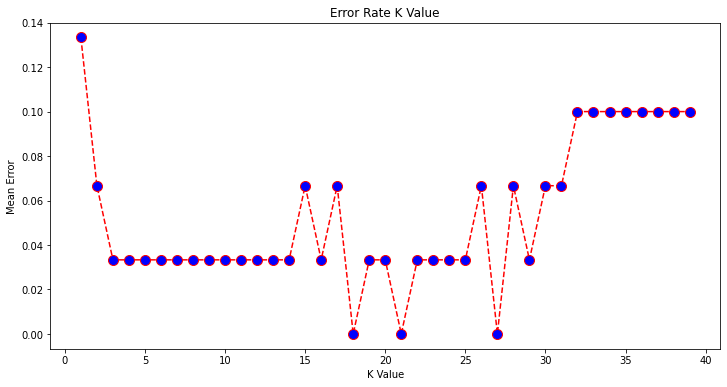

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## **Weighted K-Nearest Neighbor Algorithm**

In [8]:
import math  
def weightedkNN(points,p,k=3): 
    distance=[] 
    for group in points: 
        for feature in points[group]: 
            euclidean_distance = math.sqrt((feature[0]-p[0])**2 +(feature[1]-p[1])**2) 
            distance.append((euclidean_distance,group))  
    distance = sorted(distance)[:k] 
    freq1 = 0 # weighted sum of group 0 
    freq2 = 0 # weighted sum of group 1 
    for d in distance:
        if d[1] == 0:
            freq1 += (1 / d[0])
              
        elif d[1] == 1:
          freq2 += (1 /d[0])
    return 0 if freq1>freq2 else 1 
def main(): 
    # Dictionary of training points having two keys - 0 and 1 
    # key 0 have points belong to class 0 
    # key 1 have points belong to class 1 
    points = {0:[(0, 4),(1, 4.9),(1.6, 5.4),(2.2, 6),(2.8, 7),(3.2, 8),(3.4, 9)], 
            1:[(1.8, 1),(2.2, 3),(3, 4),(4, 4.5),(5, 5),(6, 5.5)]} 
    # query point p(x,y) 
    p = (2, 3) 
    # Number of neighbors 
    k = 5
    print("\nQuery Point p(x,y) = ", p)
    print("\nNo. of neighbors = ", k)
    print("\nThe value classified to query point is: {}".format(weightedkNN(points,p,k))) 
if __name__ == '__main__': 
    main()



Query Point p(x,y) =  (2, 3)

No. of neighbors =  5

The value classified to query point is: 1
